In [17]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

In [13]:
image=cv2.imread("images/image.jpeg")

In [16]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [70]:
blur=cv2.GaussianBlur(gray,(1,1),0)

In [71]:
thresh=cv2.bitwise_not(blur)

In [72]:
cv2.imwrite("images/thresh.jpg",thresh)

True

In [73]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

In [74]:
dilate=cv2.dilate(thresh,kernel,iterations=10)

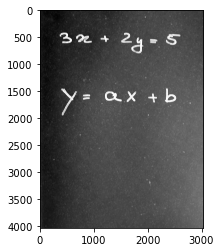

In [75]:
plt.imshow(dilate,cmap="gray")
plt.show()

In [55]:
cnts=cv2.findContours(dilate,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [60]:
cnts=cnts[0] if len(cnts)==2 else cnts[1]

In [61]:
cnts=sorted(cnts,key=lambda x:cv2.boundingRect(x)[0])

In [62]:
for c in cnts:
    x,y,w,h=cv2.boundingRect(c)
    print(x,y,w,h)
    cv2.rectangle(image,(x,y),(x+w,y+h),(36,255,12),2)

cv2.imwrite("images/boxes.jpg",image)

0 0 3024 4032


True

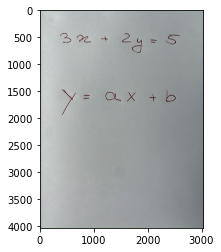

In [63]:
plt.imshow(image)
plt.show()